In [179]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cbook import boxplot_stats
from tqdm.notebook import tqdm
sns.set_palette("coolwarm")
from DataManager import DataManager

In [2]:
dm = DataManager()

In [3]:
dm.data

,drug,cell_line,replicate,n,nseg.0.m.cx.mean,nseg.0.m.cy.mean,nseg.0.m.majoraxis.mean,nseg.0.m.eccentricity.mean,nseg.0.m.theta.mean,nseg.0.s.area.mean,...,lcd.10NN.qt.0.95,lcd.10NN.qt.0.99,lcd.15NN.qt.0.01,lcd.15NN.qt.0.05,lcd.15NN.qt.0.95,lcd.15NN.qt.0.99,lcd.20NN.qt.0.01,lcd.20NN.qt.0.05,lcd.20NN.qt.0.95,lcd.20NN.qt.0.99
0,0,0,0,11.908014,10.062505,9.889313,4.720813,-0.458763,-5.396460,8.469626,...,-9.296161,-8.963428,-13.776685,-12.709686,-9.409954,-9.118151,-13.788679,-12.884619,-9.500639,-9.174099
1,0,0,1,12.368314,10.059354,10.046932,4.740584,-0.462816,-6.284735,8.510628,...,-9.290559,-8.938931,-13.088882,-12.093267,-9.439528,-9.095541,-13.010437,-12.210505,-9.502620,-9.127998
2,0,1,0,12.983570,10.000412,9.948694,4.717664,-0.407438,-6.460001,8.421265,...,-9.097825,-8.761517,-12.210008,-11.416919,-9.207236,-8.871515,-12.261069,-11.448155,-9.265325,-8.956098
3,0,1,1,12.948506,9.976027,10.005307,4.713709,-0.384049,-6.000883,8.387658,...,-9.015589,-8.646580,-12.379602,-11.365260,-9.128068,-8.779089,-12.634356,-11.489054,-9.162259,-8.739030
4,0,2,0,12.664426,9.999071,9.954613,4.714847,-0.403862,-6.195148,8.403592,...,-9.048967,-8.738565,-12.749073,-11.821687,-9.159890,-8.847677,-12.748170,-11.955179,-9.218552,-8.897580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32923,1371,9,1,13.121068,10.082178,9.964604,4.675257,-0.438223,-5.612611,8.366690,...,-8.940182,-8.616326,-12.015938,-11.214291,-9.045072,-8.663756,-12.053631,-11.241526,-9.091129,-8.685483
32924,1371,10,0,12.308481,10.077399,10.021471,4.739401,-0.399021,-6.648080,8.463474,...,-9.262980,-8.909332,-13.425723,-12.129619,-9.389004,-9.073847,-13.378090,-12.339601,-9.462127,-9.146595
32925,1371,10,1,12.196224,9.983833,10.066827,4.707107,-0.391595,-6.145939,8.393671,...,-9.125568,-8.617597,-13.139033,-12.179537,-9.274037,-8.814934,-13.266885,-12.272701,-9.348399,-8.797426
32926,1371,11,0,13.167953,10.058170,10.131641,4.683559,-0.401863,-6.164943,8.350968,...,-8.797535,-8.417296,-12.429462,-11.221106,-8.899290,-8.466269,-12.450038,-11.285509,-8.946207,-8.486387


In [4]:
dm.cell_line_df

,name,mutationDetailed,mutation,startPlate
0,02-006,AKT1-/-&AKT2-/-,AKT1/2,1.0
1,02-031,MEK2-/-,MEK2,5.0
2,02-004,AKT1-/-,AKT1,9.0
3,104-009,CTNNB1 mt-/wt+,CTNNB1 wt,13.0
4,PAR007,PARENTAL007,HCT116 P2,17.0
5,104-001,P53-/-,P53,21.0
6,104-004,PTEN-/-,PTEN,25.0
7,104-007,PI3KCA mt-/wt+,PI3KCA wt,29.0
8,104-008,KRAS mt-/wt+,KRAS wt,33.0
9,02-008,BAX-/-,BAX,37.0


# KEGG Data

In [5]:
from Bio import SeqIO
from Bio.KEGG.REST import *
from Bio.KEGG.KGML import KGML_parser
#from Bio.Graphics.KGML_vis import KGMLCanvas
#from Bio.Graphics.ColorSpiral import ColorSpiral

from IPython.display import Image, HTML, IFrame

In [6]:
human_pathways = kegg_list("pathway", "hsa").read()

#human_pathways.decode("utf-8").split("\n")[0:5]
human_pathways = human_pathways.split("\n")
human_pathways = [r.replace("path:", "").replace(" - Homo sapiens (human)", "") for r in human_pathways if r]
human_pathways = {r.split("\t")[0]: r.split("\t")[1] for r in human_pathways}
print(len(human_pathways))

337


In [7]:
human_pathways

{'hsa00010': 'Glycolysis / Gluconeogenesis',
 'hsa00020': 'Citrate cycle (TCA cycle)',
 'hsa00030': 'Pentose phosphate pathway',
 'hsa00040': 'Pentose and glucuronate interconversions',
 'hsa00051': 'Fructose and mannose metabolism',
 'hsa00052': 'Galactose metabolism',
 'hsa00053': 'Ascorbate and aldarate metabolism',
 'hsa00061': 'Fatty acid biosynthesis',
 'hsa00062': 'Fatty acid elongation',
 'hsa00071': 'Fatty acid degradation',
 'hsa00072': 'Synthesis and degradation of ketone bodies',
 'hsa00100': 'Steroid biosynthesis',
 'hsa00120': 'Primary bile acid biosynthesis',
 'hsa00130': 'Ubiquinone and other terpenoid-quinone biosynthesis',
 'hsa00140': 'Steroid hormone biosynthesis',
 'hsa00190': 'Oxidative phosphorylation',
 'hsa00220': 'Arginine biosynthesis',
 'hsa00230': 'Purine metabolism',
 'hsa00232': 'Caffeine metabolism',
 'hsa00240': 'Pyrimidine metabolism',
 'hsa00250': 'Alanine, aspartate and glutamate metabolism',
 'hsa00260': 'Glycine, serine and threonine metabolism',
 

In [8]:
database = "genes"
organism = "hsa"
organism_tcode = "T01001"
query = "MEK2"



In [9]:
def find_KEGG_entries(gene, filtering=True):
    resp = kegg_find("T01001", gene).read()
    resp_list = resp.split("\n")
    resp_list = [r for r in resp_list if r]
    query_results = []
    for r in resp_list:
        entry_id, results = r.split("\t")
        genes, description = results.split("; ")
        genes = genes.split(", ")
        if gene in genes or not filtering:
            query_results.append({"entry_id": entry_id, "gene_names": genes, "description": description})
        
    return query_results
    

In [10]:
def parse_pathways(entry_id):
    entry_content = kegg_get(entry_id).read()
    pathways_str = entry_content.split("PATHWAY")[1].split("NETWORK")[0]
    pathways = pathways_str.split("\n")
    pathways = [p.strip() for p in pathways if p]
    parsed_pathways = {}
    for p in pathways:
        path_id, description = p.split(" ", 1)
        parsed_pathways[path_id.strip()] = description.strip()
    return parsed_pathways

In [11]:
parse_pathways("hsa:207")

{'hsa01521': 'EGFR tyrosine kinase inhibitor resistance',
 'hsa01522': 'Endocrine resistance',
 'hsa01524': 'Platinum drug resistance',
 'hsa04010': 'MAPK signaling pathway',
 'hsa04012': 'ErbB signaling pathway',
 'hsa04014': 'Ras signaling pathway',
 'hsa04015': 'Rap1 signaling pathway',
 'hsa04022': 'cGMP-PKG signaling pathway',
 'hsa04024': 'cAMP signaling pathway',
 'hsa04062': 'Chemokine signaling pathway',
 'hsa04066': 'HIF-1 signaling pathway',
 'hsa04068': 'FoxO signaling pathway',
 'hsa04071': 'Sphingolipid signaling pathway',
 'hsa04072': 'Phospholipase D signaling pathway',
 'hsa04140': 'Autophagy - animal',
 'hsa04150': 'mTOR signaling pathway',
 'hsa04151': 'PI3K-Akt signaling pathway',
 'hsa04152': 'AMPK signaling pathway',
 'hsa04210': 'Apoptosis',
 'hsa04211': 'Longevity regulating pathway',
 'hsa04213': 'Longevity regulating pathway - multiple species',
 'hsa04218': 'Cellular senescence',
 'hsa04261': 'Adrenergic signaling in cardiomyocytes',
 'hsa04370': 'VEGF signal

## Gene Pathways

### AKT 1

In [12]:
find_KEGG_entries("AKT1")

[{'entry_id': 'hsa:207',
  'gene_names': ['AKT1',
   'AKT',
   'CWS6',
   'PKB',
   'PKB-ALPHA',
   'PRKBA',
   'RAC',
   'RAC-ALPHA'],
  'description': 'AKT serine/threonine kinase 1'}]

In [13]:
akt1_parsed = parse_pathways("hsa:207")
akt1_pathways = list(akt1_parsed.keys())
len(akt1_pathways)

94

### ATK1 & 2

In [14]:
find_KEGG_entries("AKT2")

[{'entry_id': 'hsa:208',
  'gene_names': ['AKT2', 'HIHGHH', 'PKBB', 'PKBBETA', 'PRKBB', 'RAC-BETA'],
  'description': 'AKT serine/threonine kinase 2'}]

In [15]:
akt2_parsed = parse_pathways("hsa:208")
akt2_pathways = list(akt2_parsed.keys())

akt1_and_2_pathways = list(set(akt1_pathways + akt2_pathways))
len(akt1_and_2_pathways)

94

### MEK2

In [16]:
find_KEGG_entries("MEK2")

[{'entry_id': 'hsa:5605',
  'gene_names': ['MAP2K2', 'CFC4', 'MAPKK2', 'MEK2', 'MKK2', 'PRKMK2'],
  'description': 'mitogen-activated protein kinase kinase 2'}]

In [17]:
mek2_parsed = parse_pathways("hsa:5605")
mek2_pathways = list(mek2_parsed.keys())
mek2_pathways

['hsa01521',
 'hsa01522',
 'hsa04010',
 'hsa04012',
 'hsa04014',
 'hsa04015',
 'hsa04022',
 'hsa04024',
 'hsa04066',
 'hsa04068',
 'hsa04071',
 'hsa04072',
 'hsa04140',
 'hsa04150',
 'hsa04151',
 'hsa04210',
 'hsa04218',
 'hsa04270',
 'hsa04370',
 'hsa04371',
 'hsa04540',
 'hsa04550',
 'hsa04620',
 'hsa04650',
 'hsa04660',
 'hsa04662',
 'hsa04664',
 'hsa04720',
 'hsa04722',
 'hsa04730',
 'hsa04810',
 'hsa04910',
 'hsa04912',
 'hsa04915',
 'hsa04916',
 'hsa04917',
 'hsa04919',
 'hsa04921',
 'hsa04926',
 'hsa04929',
 'hsa04934',
 'hsa04935',
 'hsa05010',
 'hsa05020',
 'hsa05132',
 'hsa05135',
 'hsa05160',
 'hsa05161',
 'hsa05163',
 'hsa05164',
 'hsa05165',
 'hsa05166',
 'hsa05167',
 'hsa05170',
 'hsa05200',
 'hsa05205',
 'hsa05206',
 'hsa05210',
 'hsa05211',
 'hsa05213',
 'hsa05214',
 'hsa05215',
 'hsa05216',
 'hsa05218',
 'hsa05219',
 'hsa05220',
 'hsa05221',
 'hsa05223',
 'hsa05224',
 'hsa05225',
 'hsa05226',
 'hsa05230',
 'hsa05231',
 'hsa05235']

### P53

In [18]:
find_KEGG_entries("P53")

[{'entry_id': 'hsa:7157',
  'gene_names': ['TP53', 'BCC7', 'BMFS5', 'LFS1', 'P53', 'TRP53'],
  'description': 'tumor protein p53'}]

In [19]:
p53_parsed = parse_pathways("hsa:7157")
p53_pathways = list(p53_parsed.keys())
len(p53_pathways)

50

### PTEN

In [20]:
find_KEGG_entries("PTEN")

[{'entry_id': 'hsa:5728',
  'gene_names': ['PTEN',
   '10q23del',
   'BZS',
   'CWS1',
   'DEC',
   'GLM2',
   'MHAM',
   'MMAC1',
   'PTEN1',
   'PTENbeta',
   'TEP1'],
  'description': 'phosphatase and tensin homolog'}]

In [21]:
pten_parsed = parse_pathways("hsa:5728")
pten_pathways = list(pten_parsed.keys())
len(pten_pathways)

26

### BAX

In [22]:
find_KEGG_entries("BAX")

[{'entry_id': 'hsa:581',
  'gene_names': ['BAX', 'BCL2L4'],
  'description': 'BCL2 associated X, apoptosis regulator'}]

In [23]:
bax_parsed = parse_pathways("hsa:581")
bax_pathways = list(bax_parsed.keys())
len(bax_pathways)

48

### MEK1

In [24]:
find_KEGG_entries("MEK1")

[{'entry_id': 'hsa:5604',
  'gene_names': ['MAP2K1', 'CFC3', 'MAPKK1', 'MEK1', 'MEL', 'MKK1', 'PRKMK1'],
  'description': 'mitogen-activated protein kinase kinase 1'}]

In [25]:
mek1_parsed = parse_pathways("hsa:581")
mek1_pathways = list(mek1_parsed.keys())
len(mek1_pathways)

48

### PI3KCA

In [26]:
find_KEGG_entries("PI3K", filtering=False)

[{'entry_id': 'hsa:23049',
  'gene_names': ['SMG1', '61E3.4', 'ATX', 'LIP'],
  'description': 'SMG1 nonsense mediated mRNA decay associated PI3K related kinase'},
 {'entry_id': 'hsa:5291',
  'gene_names': ['PIK3CB', 'P110BETA', 'PI3K', 'PI3KBETA', 'PIK3C1'],
  'description': 'phosphatidylinositol-4,5-bisphosphate 3-kinase catalytic subunit beta'},
 {'entry_id': 'hsa:5286',
  'gene_names': ['PIK3C2A',
   'CPK',
   'OCSKD',
   'PI3-K-C2(ALPHA)',
   'PI3-K-C2A',
   'PI3K-C2-alpha',
   'PI3K-C2alpha'],
  'description': 'phosphatidylinositol-4-phosphate 3-kinase catalytic subunit type 2 alpha'},
 {'entry_id': 'hsa:5287',
  'gene_names': ['PIK3C2B', 'C2-PI3K'],
  'description': 'phosphatidylinositol-4-phosphate 3-kinase catalytic subunit type 2 beta'},
 {'entry_id': 'hsa:23533',
  'gene_names': ['PIK3R5', 'F730038I15Rik', 'FOAP-2', 'P101-PI3K', 'p101'],
  'description': 'phosphoinositide-3-kinase regulatory subunit 5'},
 {'entry_id': 'hsa:5288',
  'gene_names': ['PIK3C2G', 'PI3K-C2-gamma', '

In [27]:
pik3kca_parsed = parse_pathways("hsa:5290")
pik3kca_pathways = list(pik3kca_parsed.keys())
len(pik3kca_pathways)

99

### KRAS

In [28]:
find_KEGG_entries("KRAS")

[{'entry_id': 'hsa:3845',
  'gene_names': ['KRAS',
   "'C-K-RAS",
   'C-K-RAS',
   'CFC2',
   'K-RAS2A',
   'K-RAS2B',
   'K-RAS4A',
   'K-RAS4B',
   'K-Ras',
   'K-Ras_2',
   'KI-RAS',
   'KRAS1',
   'KRAS2',
   'NS',
   'NS3',
   'OES',
   'RALD',
   'RASK2',
   'c-Ki-ras',
   'c-Ki-ras2'],
  'description': 'KRAS proto-oncogene, GTPase'}]

In [29]:
kras_parsed = parse_pathways("hsa:3845")
kras_pathways = list(kras_parsed.keys())
len(kras_pathways)

79

### CTNNB1

In [30]:
find_KEGG_entries("CTNNB1")

[{'entry_id': 'hsa:1499',
  'gene_names': ['CTNNB1', 'CTNNB', 'EVR7', 'MRD19', 'NEDSDV', 'armadillo'],
  'description': 'catenin beta 1'}]

In [31]:
ctnnb1_parsed = parse_pathways("hsa:1499")
ctnnb1_pathways = list(ctnnb1_parsed.keys())
len(ctnnb1_pathways)

29

# Pathways Priors

In [32]:
mutations_order = ["HCT116 P1", "HCT116 P2", "PI3KCA wt",
                   "AKT1", "AKT1/2", "PTEN", "KRAS wt",
                   "MEK1", "MEK2", "CTNNB1 wt", "P53", "BAX"]
mutations_order = list(dm.cell_line_df["mutation"])
hsa_pathways = sorted(list(human_pathways.keys()))
pathway_lists = {
    "HCT116 P1": [],
    "HCT116 P2": [],
    "PI3KCA wt": pik3kca_pathways,
    "AKT1": akt1_pathways,
    "AKT1/2": akt1_and_2_pathways,
    "PTEN": pten_pathways,
    "KRAS wt": kras_pathways,
    "MEK1": mek1_pathways,
    "MEK2": mek2_pathways,
    "CTNNB1 wt": ctnnb1_pathways,
    "P53": p53_pathways,
    "BAX": bax_pathways
}

In [33]:
mutations_order

['AKT1/2',
 'MEK2',
 'AKT1',
 'CTNNB1 wt',
 'HCT116 P2',
 'P53',
 'PTEN',
 'PI3KCA wt',
 'KRAS wt',
 'BAX',
 'MEK1',
 'HCT116 P1']

In [34]:
pathways_set = set()
for k, pw in pathway_lists.items():
    pathways_set.update(pw)
len(pathways_set)
pathways_set = sorted(list(pathways_set))

In [35]:
cl_idxs = {}
for i, mut in dm.cell_line_df["mutation"].iteritems():
    cl_idxs[mut] = i

In [36]:
cl_pathways_mask = np.zeros((len(pathways_set), len(mutations_order)))

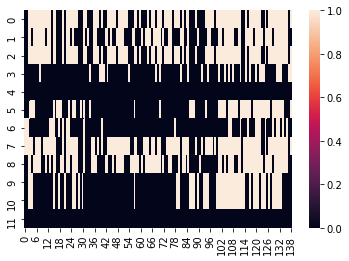

In [37]:
for i, mut in enumerate(mutations_order):
    impacted_pathways_idxs = [j for j, p in enumerate(pathways_set) if p in pathway_lists[mut]]
    cl_pathways_mask[impacted_pathways_idxs, i] = 1
cl_pathways_mask = cl_pathways_mask.T
sns.heatmap(cl_pathways_mask)

In [38]:
dmso_indexes = []
for row in dm.drug_df.itertuples():
    #"dimethyl" in row.Name or "DMSO" in row.SecName or 
    if "ctr" in row.GeneID and "DMSO" in row.Content:
        dmso_indexes.append(row.Index)
dmso_indexes

[62,
 129,
 173,
 239,
 283,
 406,
 473,
 517,
 583,
 627,
 749,
 816,
 860,
 925,
 968,
 1091,
 1158,
 1202,
 1268,
 1312]

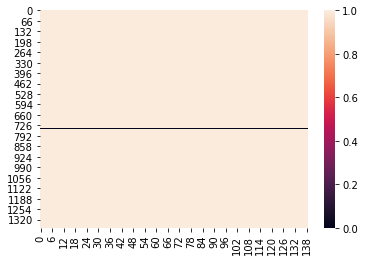

In [39]:
drug_pathways_mask = np.ones((len(pathways_set), len(dm.drug_df)))
drug_pathways_mask[:, dmso_indexes] = 0
drug_pathways_mask = drug_pathways_mask.T
sns.heatmap(drug_pathways_mask)

# Features Processing

In [40]:
control_samples = dm.get_control_samples()
control_samples

Int64Index([ 1496,  1497,  1510,  1511,  3104,  3105,  3118,  3119,  4160,
             4161,  4174,  4175,  5744,  5745,  5758,  5759,  6800,  6801,
             6814,  6815,  9752,  9753,  9766,  9767, 11360, 11361, 11374,
            11375, 12416, 12417, 12430, 12431, 14000, 14001, 14014, 14015,
            15056, 15057, 15070, 15071, 17984, 17985, 17998, 17999, 19592,
            19593, 19606, 19607, 20648, 20649, 20662, 20663, 22208, 22209,
            22222, 22223, 23240, 23241, 23254, 23255, 26192, 26193, 26206,
            26207, 27800, 27801, 27814, 27815, 28856, 28857, 28870, 28871,
            30440, 30441, 30454, 30455, 31496, 31497, 31510, 31511],
           dtype='int64')

In [41]:
avg_ctrl_features = dm.data.iloc[control_samples].drop(["drug", "cell_line", "replicate"], axis=1)
avg_ctrl_features = np.mean(np.exp2(avg_ctrl_features.values), axis=0)
avg_ctrl_features

array([1.11271623e+04, 1.03874617e+03, 1.02288407e+03, 2.54016495e+01,
       7.54897670e-01, 1.72885610e-02, 3.18331696e+02, 6.25171763e+01,
       1.05032459e+01, 7.33656259e+00, 1.27831031e+01, 4.02141528e-01,
       8.12486373e-02, 8.54314671e-02, 1.03874198e+03, 1.02289685e+03,
       2.42776688e+01, 7.67195448e-01, 1.58197737e-02, 5.26179884e-02,
       2.13528206e+00, 9.30856531e-01, 6.81780567e+00, 6.92384354e-01,
       2.67521666e+01, 5.92282472e+02, 1.35186411e+00, 1.77417219e+00,
       2.13528206e+00, 5.95753993e-01, 3.03459370e-01, 7.16064342e-01,
       4.16505991e-02, 5.44549878e+00, 5.47232029e-01, 6.78443501e+00,
       5.18704617e-01, 2.71115268e+01, 6.07467026e+02, 1.29631028e+00,
       1.87263664e+00, 5.44549878e+00, 7.73962240e-01, 1.46896080e-01,
       5.13781136e-01, 1.03871189e+03, 1.02282284e+03, 4.38961368e+01,
       8.55466477e-01, 2.07869968e-02, 7.90797277e+02, 1.21400386e+02,
       1.73235203e+01, 9.73366750e+00, 2.48642506e+01, 2.36909663e-01,
      

In [42]:
new_values = dm.data.values
new_values[:,3:] = np.exp2(new_values[:,3:]) - avg_ctrl_features
exp_df = pd.DataFrame(new_values, columns=dm.data.columns)
exp_df["drug"] = exp_df["drug"].astype(int)
exp_df["cell_line"] = exp_df["cell_line"].astype(int)
exp_df["replicate"] = exp_df["replicate"].astype(int)
exp_df

,drug,cell_line,replicate,n,nseg.0.m.cx.mean,nseg.0.m.cy.mean,nseg.0.m.majoraxis.mean,nseg.0.m.eccentricity.mean,nseg.0.m.theta.mean,nseg.0.s.area.mean,...,lcd.10NN.qt.0.95,lcd.10NN.qt.0.99,lcd.15NN.qt.0.01,lcd.15NN.qt.0.05,lcd.15NN.qt.0.95,lcd.15NN.qt.0.99,lcd.20NN.qt.0.01,lcd.20NN.qt.0.05,lcd.20NN.qt.0.95,lcd.20NN.qt.0.99
0,0,0,0,-7284.169964,30.593868,-74.509636,0.968124,-0.027288,0.006453,36.164336,...,-0.000675,-0.000880,-0.000244,-0.000398,-0.000643,-0.000938,-0.000227,-0.000394,-0.000661,-0.000987
1,0,0,1,-5839.866991,28.261114,34.975465,1.331991,-0.029329,-0.004462,46.383950,...,-0.000669,-0.000846,-0.000201,-0.000318,-0.000673,-0.000910,-0.000176,-0.000315,-0.000663,-0.000931
2,0,1,0,-3027.926975,-14.453934,-34.660359,0.910630,-0.000937,-0.005929,24.478193,...,-0.000441,-0.000579,-0.000105,-0.000181,-0.000421,-0.000603,-0.000094,-0.000168,-0.000416,-0.000705
3,0,1,1,-3222.401599,-31.620917,4.889729,0.838599,0.011387,-0.001673,16.584951,...,-0.000334,-0.000388,-0.000128,-0.000168,-0.000326,-0.000461,-0.000140,-0.000178,-0.000296,-0.000378
4,0,2,0,-4635.257378,-15.405372,-30.597441,0.859302,0.000935,-0.003640,20.304462,...,-0.000378,-0.000542,-0.000170,-0.000271,-0.000365,-0.000567,-0.000152,-0.000274,-0.000363,-0.000622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32923,1371,9,1,-2218.038332,45.275715,-23.701998,0.148453,-0.016854,0.003149,11.752371,...,-0.000230,-0.000335,-0.000074,-0.000126,-0.000220,-0.000272,-0.000062,-0.000113,-0.000208,-0.000289
32924,1371,10,0,-6054.662386,41.690949,16.469687,1.310067,0.003475,-0.007318,34.655914,...,-0.000638,-0.000803,-0.000225,-0.000324,-0.000621,-0.000882,-0.000204,-0.000333,-0.000624,-0.000954
32925,1371,10,1,-6434.393475,-26.157304,49.664382,0.718789,0.007389,-0.003167,17.983659,...,-0.000476,-0.000337,-0.000205,-0.000331,-0.000498,-0.000517,-0.000196,-0.000324,-0.000507,-0.000471
32926,1371,11,0,-1923.748549,27.385308,98.947776,0.295898,0.001983,-0.003352,8.174727,...,-0.000018,0.000042,-0.000134,-0.000128,-0.000019,0.000090,-0.000119,-0.000126,-0.000014,0.000070


# Model

In [43]:
np.random.seed(42)
ptw_ftr_matrix = np.random.randn(len(avg_ctrl_features), cl_pathways_mask.shape[0])/4
cl_ptw_matrix = np.multiply(np.random.rand(*cl_pathways_mask.shape), cl_pathways_mask)
drug_ptw_matrix = np.multiply(np.random.rand(*drug_pathways_mask.shape), drug_pathways_mask)

def predict_features(cl_id, drug_idx):
    cl_ftrs = np.dot(ptw_ftr_matrix, cl_ptw_matrix[:, cl_id])
    drug_ftrs = np.dot(ptw_ftr_matrix, drug_ptw_matrix[:, drug_idx])
    return cl_ftrs.flatten() + drug_ftrs.flatten()


In [44]:
def mse_reconstruction(ftrs, c, d, F):
    return (ftrs - np.dot(F, (c+d).reshape(-1,1)))**2

def loss_function(ftrs, c, d, F, alpha=0.1, beta=0.01, gamma=0.1):
    reconstruction_loss = mse_reconstruction(ftrs, c, d)
    l1_loss = alpha*(np.sum(np.abs(c)) + np.sum(np.abs(d)))
    l2_loss = beta*(np.sum(c**2) + np.sum(d**2))
    l2_F_loss = gamma*(np.sum(np.multiply(F, F)))
    return reconstruction_loss+l1_loss+l2_loss+l2_F_loss
    
# def grad_c(ftrs, c, d, F):
#     mse_grad = 

# Pytorch Lightning Model

In [45]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import pytorch_lightning as pl
from pytorch_lightning.core.lightning import LightningModule
from pytorch_lightning import loggers, Trainer
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from torch import device as device_
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [87]:
class FeaturesDataset(Dataset):
    def __init__(self, df, control_avg=None, train=None, val_split=0.1, standardize=False):
        super().__init__()
        
        self.control_avg = control_avg
        self.data = df.values[:,3:]
        if control_avg is not None:
            self.data -= control_avg
        self.dcr = df.values[:,:3]
        
        if train is not None:
            train_idxs, val_idxs = train_test_split(list(range(len(self.data))), 
                                                    test_size=val_split, random_state=42)
            if train:
                self.data = self.data[train_idxs,:]
                self.dcr = self.dcr[train_idxs,:]
            else:
                self.data = self.data[val_idxs,:]
                self.dcr = self.dcr[val_idxs,:]
                
        self.standardize = standardize
        self.scaler = StandardScaler()
        if standardize:
            self.data = self.scaler.fit_transform(self.data)
        self.data = torch.tensor(self.data)
        self.dcr = torch.tensor(self.dcr, dtype=torch.int32)
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, i):
        return (self.dcr[i,:], self.data[i,:])
    
    def get_control_cl_idxs(self):
        return [i for i, dcr in enumerate(self.dcr) if dcr[1] in [4,11]]
    
    def get_control_drug_idxs(self):
        return [i for i, dcr in enumerate(self.dcr) if dcr[0] in dmso_indexes]
    
    def get_index(self, drug, cell_line, replicate):
        dcr = torch.tensor([drug, cell_line, replicate])
        for i in range(len(self.dcr)):
            if self.dcr[i, :] == dcr:
                return i
        return None

class CustomLoss(nn.Module):
    def __init__(self, alpha=0.1, beta=0.01, gamma=0.01):
        super().__init__()
        self.reconstr_loss = nn.MSELoss()
        self.l1_loss = nn.L1Loss(reduction="mean")
        self.l2_loss = nn.MSELoss()
        
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        
    def forward(self, pred_ftr, target_ftr, c, d, F):
        reconstr_loss = self.reconstr_loss(pred_ftr, target_ftr)
        l1_loss = self.alpha*(self.l1_loss(c, torch.zeros_like(c))+self.l1_loss(c, torch.zeros_like(d)))
        l2_loss = self.beta*(self.l2_loss(c, torch.zeros_like(c))+self.l2_loss(c, torch.zeros_like(d)))
        l2_loss_F = self.gamma*self.l2_loss(F, torch.zeros_like(F))
        return reconstr_loss+l1_loss+l2_loss+l2_loss_F
    
class MF_Model(LightningModule):
    def __init__(self, cl_mask, drug_mask, hparams, train_dataset, val_dataset, dvc="cpu"):
        super().__init__()
        
        self.hparams = hparams
        self.dvc = dvc
#         self.use_cuda = cuda
        self.cl_mask = torch.tensor(cl_mask).detach()
        self.drug_mask = torch.tensor(drug_mask).detach()
#         if dvc == "cuda":
#             self.cl_mask = self.cl_mask.cuda()
#             self.drug_mask = self.drug_mask.cuda()
        self.train_dataset = train_dataset
        self.val_dataset = val_dataset
        
        torch.manual_seed(42)
        self.cl_embedding = nn.Embedding(*cl_mask.shape)
        self.cl_embedding.weight.data *= self.cl_mask
#         self.cl_embedding.weight.data = self.cl_mask
        self.drug_embedding = nn.Embedding(*drug_mask.shape)
        self.drug_embedding.weight.data *= self.drug_mask

        
        n_pathways = drug_mask.shape[1]
        n_ftrs = hparams.get("n_ftrs", 385)
        self.ftr_ptw = nn.Linear(n_pathways, n_ftrs, bias=False)
        
        self.layers = {"cl_embedding": self.cl_embedding,
                       "drug_embedding": self.drug_embedding,
                        "pathway_effect": self.ftr_ptw}
        self.lambda_ftr = hparams.get("lambda_ftr", 0.01)
        self.lambda_drg = hparams.get("lambda_drg", 0.01)
        self.loss_function = nn.MSELoss()
        self.activation = None
        activation = hparams.get("activation", None)
        if activation == "Sigmoid":
            self.activation = nn.Sigmoid()
        elif activation == "Tanh":
            self.activation = nn.Tanh()
        elif activation == "ReLU":
            self.activation = nn.ReLU()
            
    def get_matrix(self, name):
        if name == "cl_embedding":
            matrix = self.cl_embedding.weight.data
            if self.activation is not None:
                matrix = self.activation(matrix)
            return matrix
        elif name == "drug_embedding":
            matrix = self.drug_embedding.weight.data
            if self.activation is not None:
                matrix = self.activation(matrix)
            return matrix
        elif name == "pathway_effect":
            return self.ftr_ptw.weight.data
        return None
        
    def freeze_layer(self, layer_name):
        assert layer_name in self.layers.keys()
        for param in self.layers[layer_name].parameters():
            param.requires_grad = False
    
    def freeze_all(self):
        for layer in self.layers.values():
            for param in layer.parameters():
                param.requires_grad = False
            
    def unfreeze_layer(self, layer_name):
        assert layer_name in self.layers.keys()
        for param in self.layers[layer_name].parameters():
            param.requires_grad = True
            
    def unfreeze_all(self):
        for layer in self.layers.values():
            for param in layer.parameters():
                param.requires_grad = True
                
    def forward(self, drg_idx, cl_idx):
        drg_idx = drg_idx.long()
        cl_idx = cl_idx.long()
        if self.dvc == "cuda":
            drg_idx = drg_idx.cuda()
            cl_idx = cl_idx.cuda()
        drug_embedding = self.drug_embedding(drg_idx)
        cl_embedding = self.drug_embedding(cl_idx)
        if self.dvc == "cuda":
            drug_embedding *= self.drug_mask[drg_idx, :].cuda()
            cl_embedding *= self.cl_mask[cl_idx, :].cuda()
        else:
            drug_embedding *= self.drug_mask[drg_idx, :]
            cl_embedding *= self.cl_mask[cl_idx, :]
            
        drug_ftrs = self.ftr_ptw(drug_embedding)
        cl_ftrs = self.ftr_ptw(cl_embedding)
        if self.activation is not None:
            drug_ftrs = self.activation(drug_ftrs)
            cl_ftrs = self.activation(cl_ftrs)
        return drug_ftrs + cl_ftrs
    
    def configure_optimizers(self):
        lr = self.hparams.get("lr", 0.01)
        optimizer = torch.optim.SGD(self.parameters(), lr=lr)
        return optimizer
    
    def train_dataloader(self):
        loader = DataLoader(self.train_dataset,
                            batch_size=self.hparams["batch_size"],
                            num_workers=self.hparams["num_workers"],
                            shuffle=True,
                            drop_last=True, pin_memory=True)
        return loader

    def val_dataloader(self):
        loader = DataLoader(self.val_dataset,
                            batch_size=self.hparams["batch_size"],
                            num_workers=self.hparams["num_workers"],
                            shuffle=False,
                            drop_last=True, pin_memory=True)
        return loader
    
    def init_matrices(self, lr=0.01):
#         for param_group in self.optimizer.param_groups:
#             param_group['lr'] = lr
        optimizer = torch.optim.SGD(self.parameters(), lr=lr)
    
        print("Initializing cl matrix value by using control drug samples only")
        control_drug_idxs = self.train_dataset.get_control_drug_idxs()
        self.unfreeze_all()
        self.freeze_layer("drug_embedding")
        dcr, ftrs = self.train_dataset[control_drug_idxs]
        drg = dcr[:,0].long()
        cl = dcr[:,1].long()
        errors_list = []
        #for n_iter in tqdm(range(100)):
        counter = 0
        while True:
            counter +=1
            
            pred_ftrs = self(drg, cl)
            error = self.loss_function(pred_ftrs, ftrs.cuda())
#                           mf_model.cl_embedding(cl), mf_model.drug_embedding(drg), 
#                           mf_model.ftr_ptw.weight.data)
            error.backward()
            errors_list.append(error.item())
            print("\rIteration {}, Error: {}".format(counter, errors_list[-1]), end="")
            optimizer.step()
            optimizer.zero_grad()
            if len(errors_list)>2:
                if np.abs(errors_list[-1]-errors_list[-2])<0.00001:
                    break
            if counter > 1000: break
        fig, ax = plt.subplots(figsize=(10,10))
        ax.plot(range(len(errors_list)), errors_list)
        plt.show()
        
        print("Initializing drug matrix value by using control cl only and freezing ftrs")
        control_cl_idxs = self.train_dataset.get_control_drug_idxs()
        self.freeze_all()
        self.unfreeze_layer("drug_embedding")
        dcr, ftrs = self.train_dataset[control_cl_idxs]
        drg = dcr[:,0].long()
        cl = dcr[:,1].long()
        errors_list = []
        #for n_iter in tqdm(range(100)):
        counter = 0
        while True:
            counter +=1      
            pred_ftrs = self(drg, cl)
            error = self.loss_function(pred_ftrs, ftrs.cuda())
#                           mf_model.cl_embedding(cl), mf_model.drug_embedding(drg), 
#                           mf_model.ftr_ptw.weight.data)
            error.backward()
            errors_list.append(error.item())
            print("\rIteration {}, Error: {}".format(counter, errors_list[-1]), end="")
            optimizer.step()
            optimizer.zero_grad()
            if len(errors_list)>2:
                if np.abs(errors_list[-1]-errors_list[-2])<0.00001:
                    break
            if counter > 1000: break
        fig, ax = plt.subplots(figsize=(10,10))
        ax.plot(range(len(errors_list)), errors_list)
        plt.show()
        
        print("Refine ftrs by freezing the rest on the whole dataset")
        self.freeze_all()
        self.unfreeze_layer("pathway_effect")

        errors_list = []
        #for n_iter in tqdm(range(100)):
        counter = 0
        loader = self.train_dataloader()
        while True:
            epoch_error = 0
            for i_batch, batch in enumerate(loader):
                dcr, ftrs = batch
                drg = dcr[:,0].long()
                cl = dcr[:,1].long()
                pred_ftrs = self(drg, cl)
                error = self.loss_function(pred_ftrs, ftrs.cuda()) 
#                               mf_model.cl_embedding(cl), mf_model.drug_embedding(drg), 
#                               mf_model.ftr_ptw.weight.data)
                error.backward()
                epoch_error += error.item()
            errors_list.append(epoch_error/(i_batch+1))
            counter +=1
            print("\rIteration {}, Error: {}".format(counter, errors_list[-1]), end="")
            optimizer.step()
            optimizer.zero_grad()
            if len(errors_list)>2:
                if np.abs(errors_list[-1]-errors_list[-2])<0.00001:
                    break
            if counter > 1000: break
        fig, ax = plt.subplots(figsize=(10,10))
        ax.plot(range(len(errors_list)), errors_list)
        plt.show()
                
    def training_step(self, batch, batch_idx):
        dcr, ftrs = batch
        drg = dcr[:,0].long()
        cl = dcr[:,1].long()
        pred_ftrs = self(drg, cl)
        train_loss = self.loss_function(pred_ftrs, ftrs.cuda())
        ftr_layer_params = torch.cat([x.view(-1) for x in self.ftr_ptw.parameters()])
        l1_ftr = self.lambda_ftr * torch.norm(ftr_layer_params, 1)
        drg_layer_params = torch.cat([x.view(-1) for x in self.drug_embedding.parameters()])
        l1_drg = self.lambda_drg * torch.norm(drg_layer_params, 1)
        return {"loss": train_loss + l1_ftr + l1_drg, "l1_ftr": l1_ftr, "l1_drg": l1_drg}
    
    def validation_step(self, batch, batch_idx):
        dcr, ftrs = batch
        drg = dcr[:,0].long()
        cl = dcr[:,1].long()
        pred_ftrs = self(drg, cl)
        val_loss = self.loss_function(pred_ftrs, ftrs.cuda())
        ftr_layer_params = torch.cat([x.view(-1) for x in self.ftr_ptw.parameters()])
        l1_ftr = self.lambda_ftr * torch.norm(ftr_layer_params, 1)
        drg_layer_params = torch.cat([x.view(-1) for x in self.drug_embedding.parameters()])
        l1_drg = self.lambda_drg * torch.norm(drg_layer_params, 1)
        return {"loss": val_loss, "l1_ftr": l1_ftr, "l1_drg": l1_drg}
    
    def validation_epoch_end(self, outputs):
        if outputs:
            avg_loss = torch.stack([x['loss'] for x in outputs]).mean()
            avg_l1_ftr_loss = torch.stack([x['l1_ftr'] for x in outputs]).mean()
            avg_l1_drg_loss = torch.stack([x['l1_drg'] for x in outputs]).mean()
            tensorboard_logs = {'val_loss': avg_loss, "l1_ftr": avg_l1_ftr_loss, "l1_drg": avg_l1_drg_loss}
            return {'val_loss': avg_loss, 'log': tensorboard_logs}
        return {}
    
    

In [88]:
list(mf_model.drug_embedding.parameters())

[Parameter containing:
 tensor([[ 0.7669,  1.6211,  0.0451,  ...,  0.5370, -2.3560, -0.8686],
         [-2.2613, -1.0091,  0.5115,  ...,  1.3398, -1.1170, -0.5898],
         [ 0.5268, -0.9870,  0.3480,  ...,  0.4978,  0.3924, -2.2301],
         ...,
         [-0.4736, -0.2744, -0.4921,  ...,  0.0638, -0.5316, -0.3077],
         [ 0.7791, -0.7593, -0.8291,  ...,  2.0686, -1.4308,  0.6009],
         [-0.0492, -0.4347,  0.7502,  ...,  0.2537,  1.1460,  0.3102]],
        dtype=torch.float64, requires_grad=True)]

In [116]:
model_config = {"lr": 0.001, "batch_size": 32, "num_workers": 8, "activation": "Tanh", "lambda_ftr": 0.00001, "lambda_drg": 0.01}
train_ftrs_ds = FeaturesDataset(exp_df, None, train=True, standardize=True)
val_ftrs_ds = FeaturesDataset(exp_df, None, train=False, standardize=True)

device = device_("cuda" if torch.cuda.is_available() else "cpu")
mf_model = MF_Model(cl_pathways_mask, drug_pathways_mask, model_config, train_ftrs_ds, val_ftrs_ds, dvc=device.type).to(device).double()

In [97]:
mf_model.init_matrices()

Initializing cl matrix value by using control drug samples only


KeyboardInterrupt: 

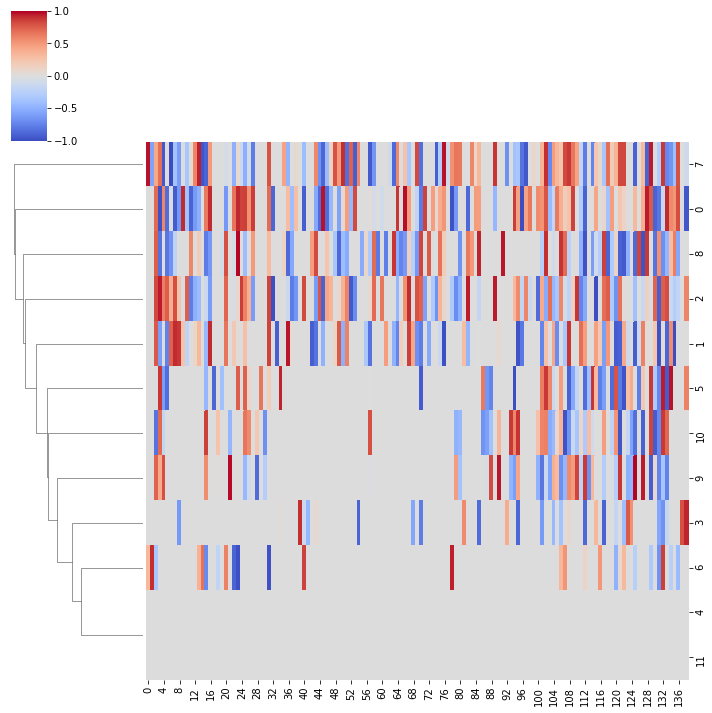

In [63]:
pretrain_cl_emb = mf_model.get_matrix("cl_embedding").cpu().numpy().astype(float).copy()
#fig, ax = plt.subplots(figsize=(10,10))
#sns.heatmap(cl_emb, ax=ax)
gs = sns.clustermap(pretrain_cl_emb, col_cluster=False, method='centroid', cmap="coolwarm", vmin=-1, vmax=1 )
#gs.ax_heatmap.set_yticklabels(dm.cell_line_df["mutation"])
plt.show()

/is/ei/gvisona/anaconda3/envs/ml/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


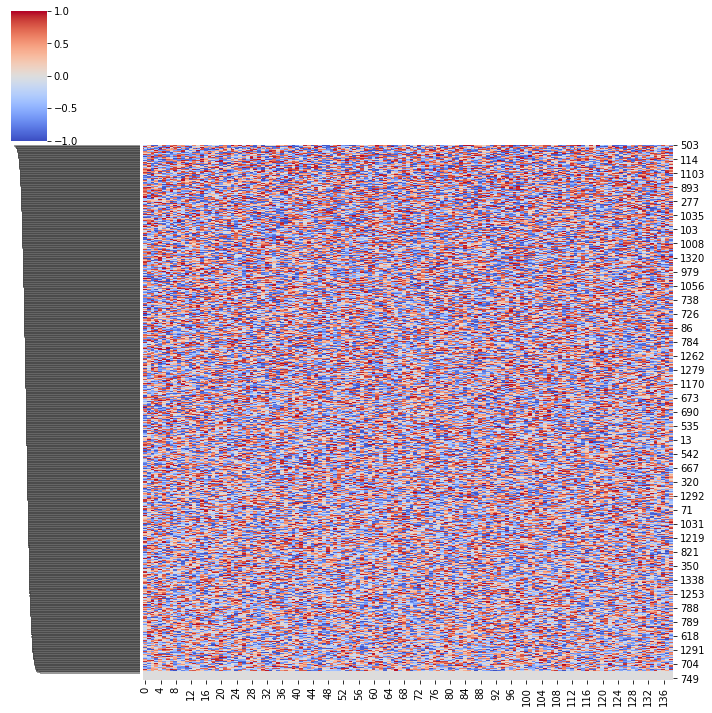

In [64]:
pretrain_drug_emb = mf_model.get_matrix("drug_embedding").cpu().numpy().astype(float).copy()
#fig, ax = plt.subplots(figsize=(10,10))
#sns.heatmap(drug_emb, ax=ax)
# with sns.color_palette("PuBuGn_d"):
# sns.set_palette("husl")
sns.clustermap(pretrain_drug_emb, col_cluster=False, method='centroid', cmap="coolwarm", vmin=-1, vmax=1 )
plt.show()

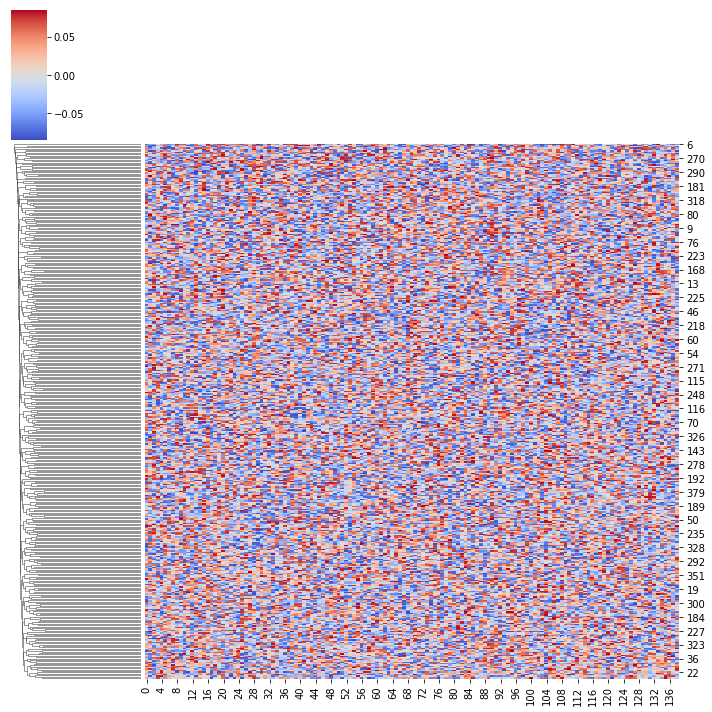

In [65]:
pretrain_ftr_pat = mf_model.get_matrix("pathway_effect").cpu().numpy().astype('float').copy()
np.max(pretrain_ftr_pat)
lim = max(np.abs(np.max(pretrain_ftr_pat)), np.abs(np.min(np.max(pretrain_ftr_pat))))
#fig, ax = plt.subplots(figsize=(18,28))
sns.clustermap(pretrain_ftr_pat, col_cluster=False, cmap="coolwarm", vmin = -lim, vmax=lim)
plt.show()

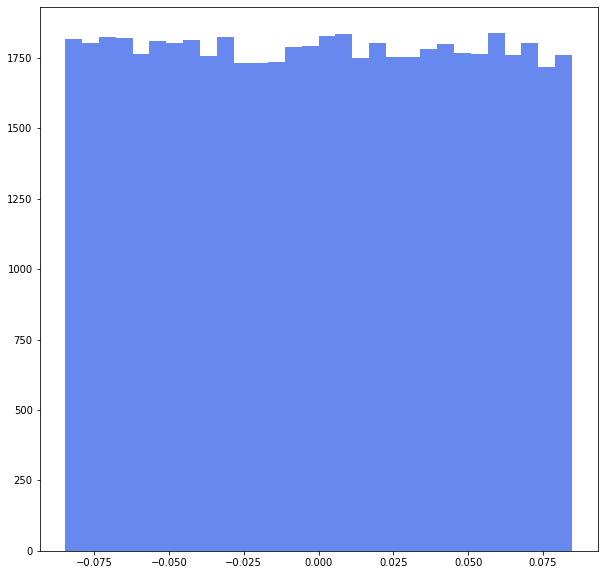

In [66]:
fig, ax = plt.subplots(figsize=(10,10))
ax.hist(pretrain_ftr_pat.flatten(), bins=30)
plt.show()

In [117]:
neptune_logger = loggers.NeptuneLogger(
        api_key="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vdWkubmVwdHVuZS5haSIsImFwaV91cmwiOiJodHRwczovL3VpLm5lcHR1bmUuYWkiLCJhcGlfa2V5IjoiYTNiN2FlZWQtODk2Yy00NmE5LThmMGItYWUxZmViYmE5OGQ4In0=",
        project_name="gvisona/idr0017",
        params=model_config,
        experiment_name="MF")

torch.manual_seed(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(42)

early_stopping_cb = EarlyStopping('val_loss', patience=5)
# mf_model = mf_model.cuda()
trainer = Trainer(gpus=1,
                  max_epochs=100,
                  
                  logger=[neptune_logger],
                  callbacks=[early_stopping_cb])
trainer.fit(mf_model)

https://ui.neptune.ai/gvisona/idr0017/e/IDR-59


NeptuneLogger will work in online mode
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
CUDA_VISIBLE_DEVICES: [0]

  | Name           | Type      | Params
---------------------------------------------
0 | cl_embedding   | Embedding | 1 K   
1 | drug_embedding | Embedding | 190 K 
2 | ftr_ptw        | Linear    | 53 K  
3 | loss_function  | MSELoss   | 0     
4 | activation     | Tanh      | 0     


1

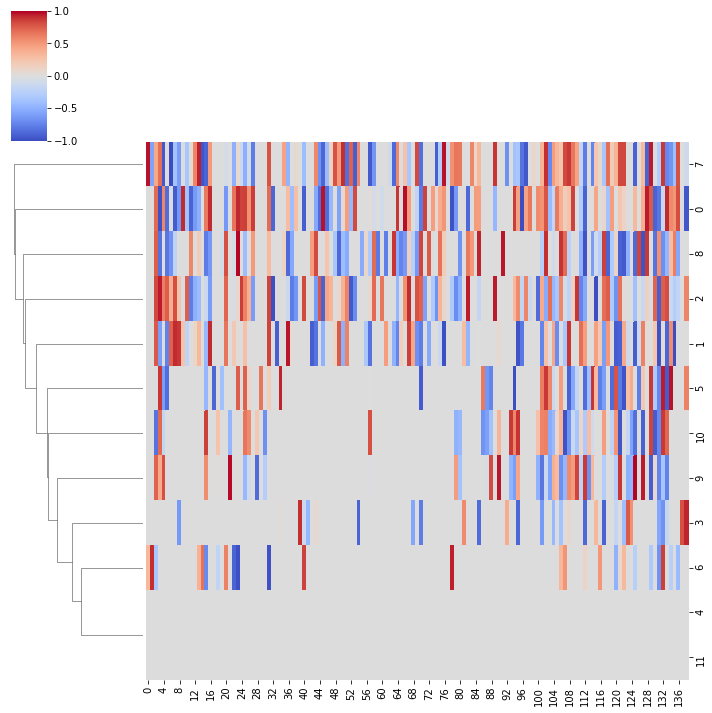

In [134]:
cl_emb = mf_model.get_matrix("cl_embedding").cpu().numpy().astype(float)
#fig, ax = plt.subplots(figsize=(10,10))
#sns.heatmap(cl_emb, ax=ax)
gs = sns.clustermap(cl_emb, col_cluster=False, method='centroid', cmap="coolwarm", vmin=-1, vmax=1 )
#gs.ax_heatmap.set_yticklabels(dm.cell_line_df["mutation"])
plt.show()

/is/ei/gvisona/anaconda3/envs/ml/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


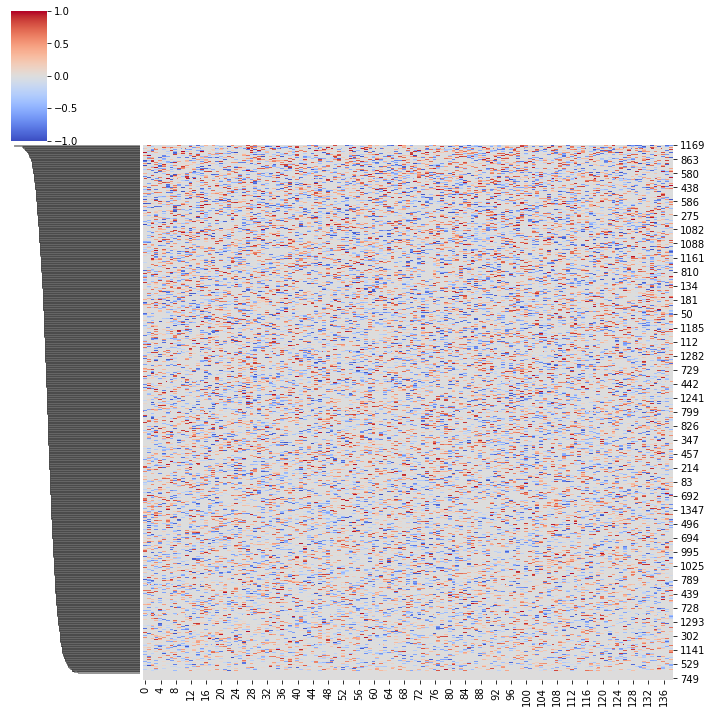

In [135]:
drug_emb = mf_model.get_matrix("drug_embedding").cpu().numpy().astype(float).copy()
#fig, ax = plt.subplots(figsize=(10,10))
#sns.heatmap(drug_emb, ax=ax)
sns.clustermap(drug_emb, col_cluster=False, method='centroid', cmap="coolwarm", vmin=-1, vmax=1 )
plt.show()

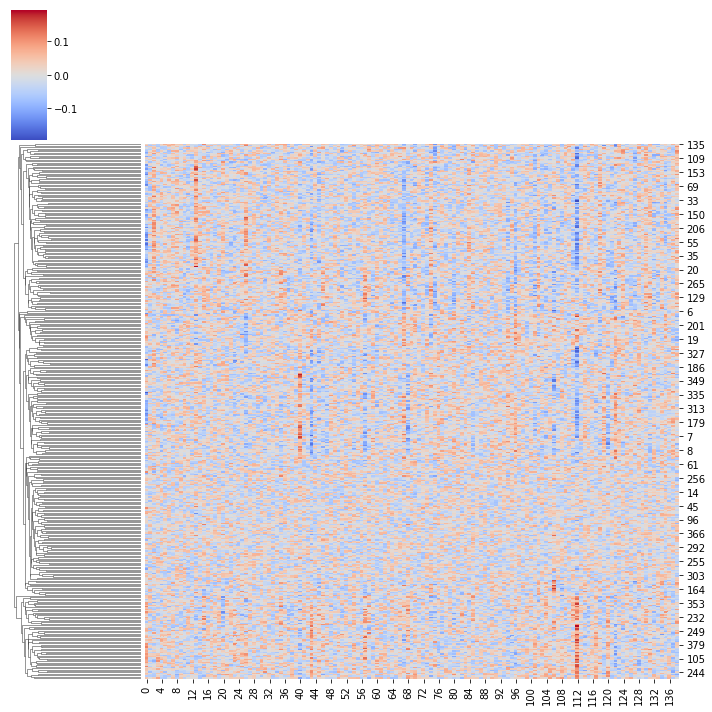

In [136]:
ftr_pat = mf_model.get_matrix("pathway_effect").cpu().numpy().astype('float').copy()
#fig, ax = plt.subplots(figsize=(18,28))
lim = max(np.abs(np.max(ftr_pat)), np.abs(np.min(np.max(ftr_pat))))
#fig, ax = plt.subplots(figsize=(18,28))
sns.clustermap(ftr_pat, col_cluster=False, cmap="coolwarm", vmin = -lim, vmax=lim)

plt.show()

In [137]:
np.save("cl_emb-idr59.npy", cl_emb)
np.save("drug_emb-idr59.npy", drug_emb)
np.save("ftr_pat-idr59.npy", ftr_pat)

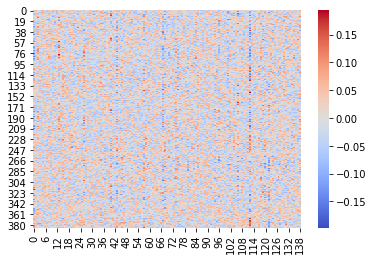

In [138]:
sns.heatmap(ftr_pat, cmap="coolwarm")


In [133]:
transformed_data = train_ftrs_ds.scaler.transform(exp_df.values[:,3:])
test_df = pd.DataFrame(np.concatenate((exp_df.values[:,:3], transformed_data), axis=1), columns = dm.data.columns)
test_df["drug"] = test_df["drug"].astype(int)
test_df["cell_line"] = test_df["cell_line"].astype(int)
test_df["replicate"] = test_df["replicate"].astype(int)
reconstr_ds = FeaturesDataset(test_df, train=None)

In [170]:
residuals = None
relative_error = None
for dcr, ftrs in reconstr_ds:
    d,c,r = dcr.long()
    reconstr_ftrs = mf_model.to(device)(torch.LongTensor([d]).cuda(),torch.LongTensor([c]).cuda())
    res = torch.abs(reconstr_ftrs - ftrs.cuda())
    rel_err = torch.div(res, ftrs.cuda()+1e-5)
    if residuals is None:
        residuals = res
    else:
        residuals = torch.cat((residuals, res), axis=0)
        
    if relative_error is None:
        relative_error = rel_err
    else:
        relative_error = torch.cat((relative_error, rel_err), axis=0)


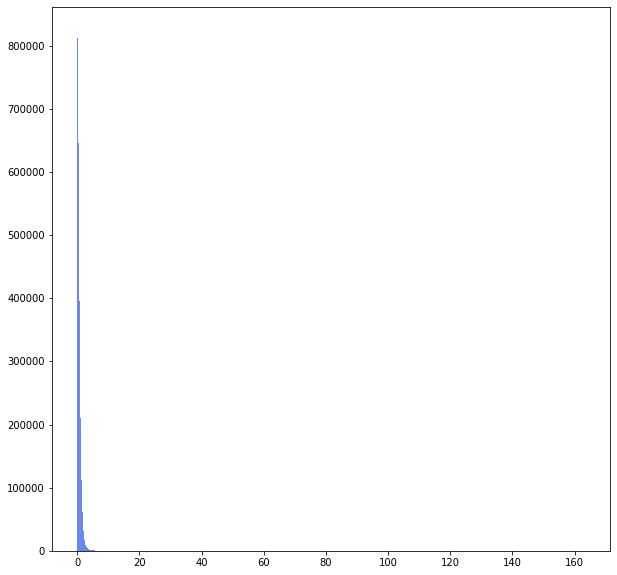

In [180]:
residuals_array = residuals.cpu().detach().numpy().flatten()
fig, ax = plt.subplots(figsize=(10,10))
ax.hist(residuals_array, bins=3000)
plt.show()

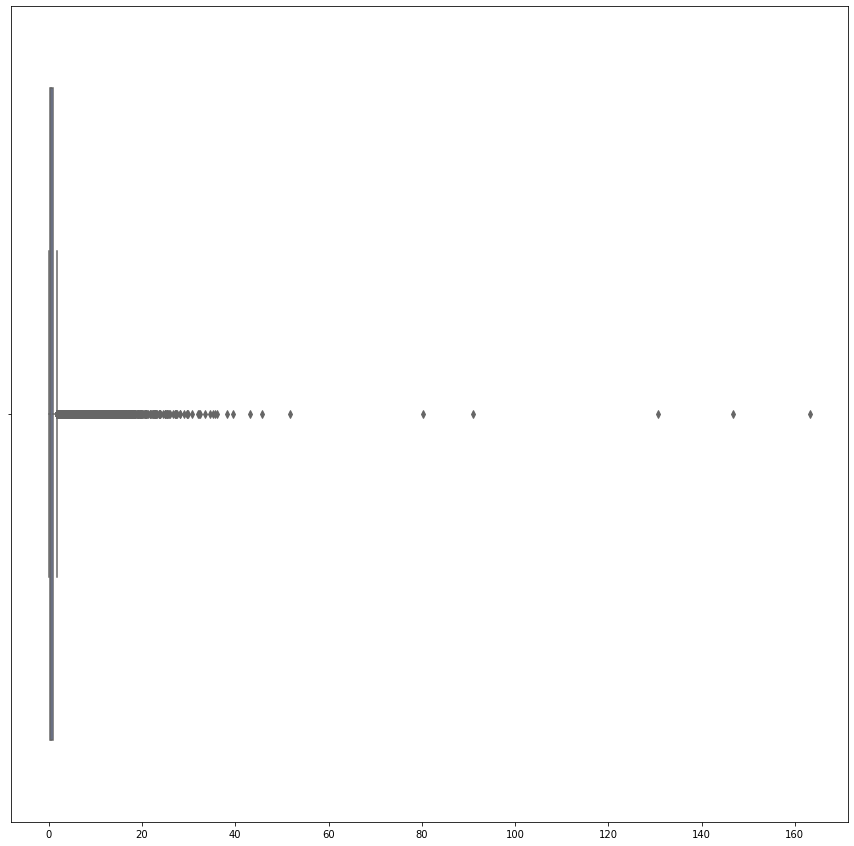

In [181]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.boxplot(x=residuals_array, ax=ax)

In [187]:
outliers = [y for stat in boxplot_stats(residuals_array) for y in stat['fliers']]
len(outliers)/len(residuals_array)

0.045363437582825336

In [186]:
min(outliers)

1.7720481077744954

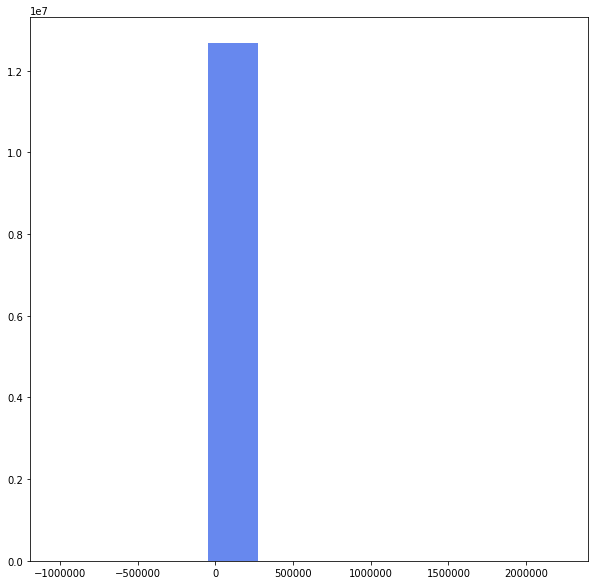

In [189]:
rel_residuals_array = relative_error.cpu().detach().numpy().flatten()
fig, ax = plt.subplots(figsize=(10,10))
ax.hist(rel_residuals_array)
plt.show()

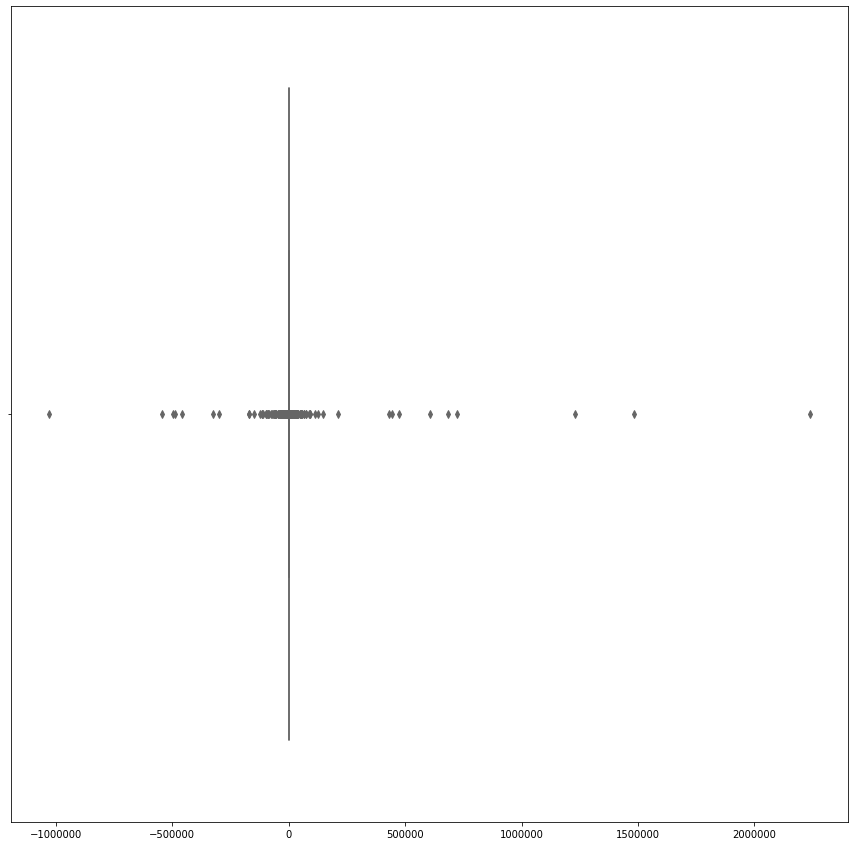

In [190]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.boxplot(x=rel_residuals_array, ax=ax)